In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv'

In [18]:
df = pd.read_csv(data)

In [19]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [21]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


# DATA PREPARATION

In [22]:
df = df.drop(columns=['student_id'])
df = df.fillna(0)

In [23]:
df.describe().round()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,age,assignments_completed
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,174.0,20.0,84.0,3.0,10.0,18.0,2.0
std,48.0,10.0,9.0,1.0,5.0,2.0,1.0
min,100.0,0.0,50.0,1.0,0.0,15.0,1.0
25%,135.0,13.0,78.0,2.0,7.0,16.0,1.0
50%,170.0,19.0,84.0,2.0,10.0,18.0,1.0
75%,209.0,26.0,91.0,3.0,13.0,20.0,2.0
max,367.0,40.0,100.0,5.0,20.0,22.0,5.0


In [24]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.jamb_score).values.astype('int')
y_val = (df_val.jamb_score).values.astype('int')
y_test = (df_test.jamb_score).values.astype('int')

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [25]:
df_train.head()

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,0,3
1,11,80,2,3.3,Public,Urban,Yes,Yes,Medium,High,22,Female,Medium,Secondary,1
2,31,82,1,8.3,Public,Urban,Yes,Yes,Low,High,19,Female,High,Tertiary,2
3,29,79,1,15.8,Public,Rural,Yes,Yes,Low,Low,19,Male,Low,Primary,2
4,28,96,2,8.9,Private,Rural,Yes,Yes,Medium,Low,19,Male,High,Secondary,3


# Question 1: train a decision tree regressor to predict the jamb_score variable.

In [56]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [57]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [58]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [59]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [61]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [62]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Question 2: Train a random forest model with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [76]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 42.14


# Question 3: Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset


In [81]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    val_dicts = df_val.fillna(0).to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    y_pred = rf.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n, rmse))
    print(f'n_estimators: {n}, RMSE: {rmse:.3f}')
    

n_estimators: 10, RMSE: 42.137
n_estimators: 20, RMSE: 41.461
n_estimators: 30, RMSE: 41.106
n_estimators: 40, RMSE: 40.917
n_estimators: 50, RMSE: 40.852
n_estimators: 60, RMSE: 40.784
n_estimators: 70, RMSE: 40.677
n_estimators: 80, RMSE: 40.539
n_estimators: 90, RMSE: 40.504
n_estimators: 100, RMSE: 40.517
n_estimators: 110, RMSE: 40.593
n_estimators: 120, RMSE: 40.625
n_estimators: 130, RMSE: 40.651
n_estimators: 140, RMSE: 40.595
n_estimators: 150, RMSE: 40.597
n_estimators: 160, RMSE: 40.604
n_estimators: 170, RMSE: 40.628
n_estimators: 180, RMSE: 40.641
n_estimators: 190, RMSE: 40.631
n_estimators: 200, RMSE: 40.601


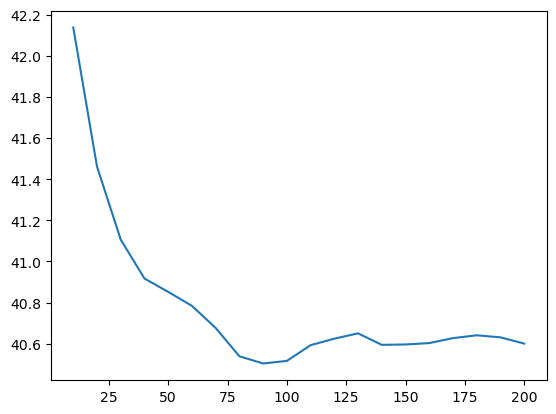

In [83]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

# Question 4: Let's select the best max_depth

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1


In [87]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        val_dicts = df_val.fillna(0).to_dict(orient='records')
        X_val = dv.transform(val_dicts)

        y_pred = rf.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))

In [91]:
scores_df = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])

scores_df.head()

,max_depth,n_estimators,rmse
0,10,10,41.258349
1,10,20,40.880528
2,10,30,40.624956
3,10,40,40.270069
4,10,50,40.317006


In [92]:
mean_rmse_per_depth = scores_df.groupby('max_depth')['rmse'].mean()

best_max_depth = mean_rmse_per_depth.idxmin()
best_rmse = mean_rmse_per_depth.min()

print(f'Best max_depth: {best_max_depth}, Mean RMSE: {best_rmse:.2f}')

Best max_depth: 10, Mean RMSE: 40.39


In [93]:
mean_rmse_per_depth

max_depth
10    40.392498
15    40.735282
20    40.739734
25    40.787866
Name: rmse, dtype: float64

# Question 5: We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.


In [94]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse:.3f}')

RMSE: 42.025


In [98]:
importances = rf.feature_importances_
feature_names = dv.get_feature_names_out()

feature_importance_dict = dict(zip(feature_names, importances))

features_to_consider = ['study_hours_per_week', 'attendance_rate', 'distance_to_school', 'teacher_quality']
filtered_importance = {feature: feature_importance_dict[feature] for feature in features_to_consider}

most_important_feature = max(filtered_importance, key=filtered_importance.get)

print(f'The most important feature is: {most_important_feature}')

The most important feature is: study_hours_per_week


# Question 6: Now let's train an XGBoost model! For this question, we'll tune the eta parameter


In [100]:
!pip install xgboost

In [99]:
import xgboost as xgb

In [104]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [112]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
watchlist

[(<xgboost.core.DMatrix at 0x27d982eaae0>, 'train'),
 (<xgboost.core.DMatrix at 0x27d95a4acf0>, 'val')]

In [113]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse:.3f}')

[0]	train-rmse:42.69552	val-rmse:44.86028
[1]	train-rmse:39.85005	val-rmse:43.06070
[2]	train-rmse:37.95285	val-rmse:41.83772
[3]	train-rmse:36.52203	val-rmse:41.26987
[4]	train-rmse:35.36066	val-rmse:41.02965
[5]	train-rmse:34.43646	val-rmse:40.87186
[6]	train-rmse:33.71528	val-rmse:40.69132
[7]	train-rmse:33.07449	val-rmse:40.65074
[8]	train-rmse:32.41772	val-rmse:40.72710
[9]	train-rmse:31.91000	val-rmse:40.82972
[10]	train-rmse:31.55119	val-rmse:40.83684
[11]	train-rmse:30.99534	val-rmse:40.98243
[12]	train-rmse:30.33163	val-rmse:41.05515
[13]	train-rmse:30.04347	val-rmse:41.18635
[14]	train-rmse:29.44279	val-rmse:41.32160
[15]	train-rmse:29.08791	val-rmse:41.37832
[16]	train-rmse:28.84106	val-rmse:41.45737
[17]	train-rmse:28.28883	val-rmse:41.51113
[18]	train-rmse:27.90071	val-rmse:41.55139
[19]	train-rmse:27.60694	val-rmse:41.66496
[20]	train-rmse:27.24424	val-rmse:41.80313
[21]	train-rmse:26.79013	val-rmse:41.88767
[22]	train-rmse:26.64232	val-rmse:41.90488
[23]	train-rmse:26.31

In [114]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse:.3f}')

[0]	train-rmse:45.50072	val-rmse:46.99373
[1]	train-rmse:44.12583	val-rmse:45.89771
[2]	train-rmse:42.92815	val-rmse:45.01746
[3]	train-rmse:41.90445	val-rmse:44.27569
[4]	train-rmse:40.94238	val-rmse:43.62411
[5]	train-rmse:40.15460	val-rmse:43.05644
[6]	train-rmse:39.43451	val-rmse:42.64605
[7]	train-rmse:38.77902	val-rmse:42.28889
[8]	train-rmse:38.17103	val-rmse:42.00035
[9]	train-rmse:37.60436	val-rmse:41.73633
[10]	train-rmse:37.11353	val-rmse:41.55631
[11]	train-rmse:36.65501	val-rmse:41.33670
[12]	train-rmse:36.26337	val-rmse:41.18307
[13]	train-rmse:35.84634	val-rmse:41.03057
[14]	train-rmse:35.45796	val-rmse:40.89024
[15]	train-rmse:35.07766	val-rmse:40.70892
[16]	train-rmse:34.73181	val-rmse:40.60601
[17]	train-rmse:34.40922	val-rmse:40.47982
[18]	train-rmse:34.13466	val-rmse:40.43780
[19]	train-rmse:33.88018	val-rmse:40.38390
[20]	train-rmse:33.57997	val-rmse:40.37859
[21]	train-rmse:33.33993	val-rmse:40.33974
[22]	train-rmse:33.08144	val-rmse:40.31700
[23]	train-rmse:32.90